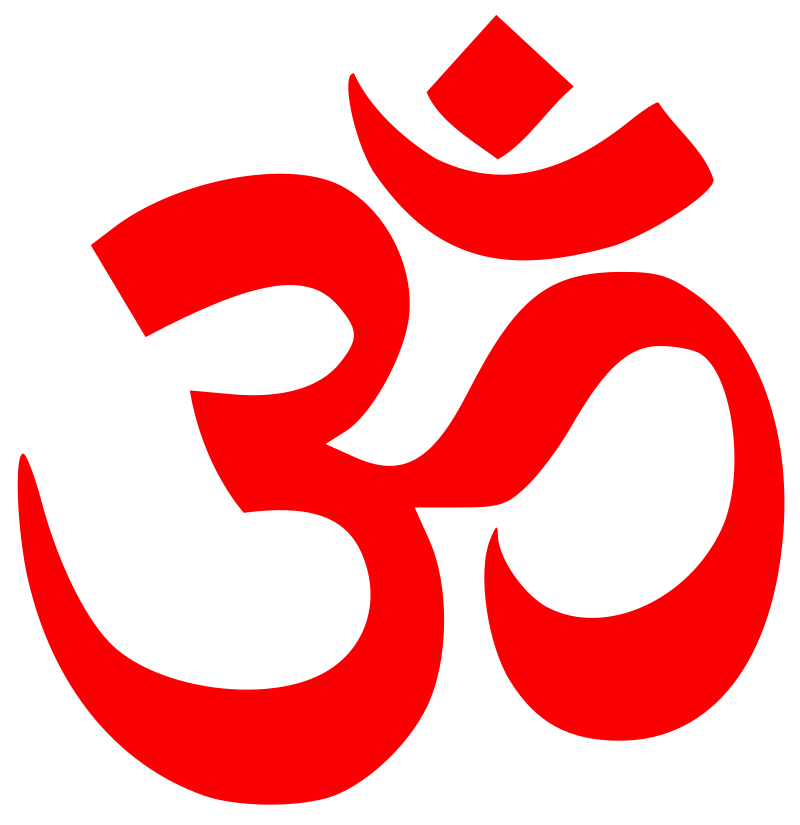

In [14]:
from IPython.display import Image,display
display(Image(filename="./src/images/omsym.png",width=150,height=150
))


Load and Inspect Data

In [2]:
# Load the necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (replace the path if necessary)
data = pd.read_csv('./datasets/eeg_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,skewness,variance,kurtosis,shannon_entropy,label
0,0.549671,0.187618,0.308144,0.994394,0
1,0.486174,0.202472,0.251629,1.018497,1
2,0.564769,0.161884,0.323875,0.835915,0
3,0.652303,0.213794,0.361274,0.853916,1
4,0.476585,0.170679,0.245063,1.036052,1


Descriptive Statistics and Datasets summary

In [3]:
# Descriptive statistics
print("\nDescriptive Statistics of EEG data:")
data.describe()

# Check for missing values
print("\nMissing Values Check:")
print(data.isnull().sum())

# Value counts of the label (0: Pre-Meditation, 1: Post-Meditation)
print("\nLabel Distribution (0: Pre-Meditation, 1: Post-Meditation):")
print(data['label'].value_counts())


Descriptive Statistics of EEG data:

Missing Values Check:
skewness           0
variance           0
kurtosis           0
shannon_entropy    0
label              0
dtype: int64

Label Distribution (0: Pre-Meditation, 1: Post-Meditation):
label
1    4338
0    4266
Name: count, dtype: int64


Histograms of features (Skewness,Variance,Kurtosis,Shannon_Entropy)

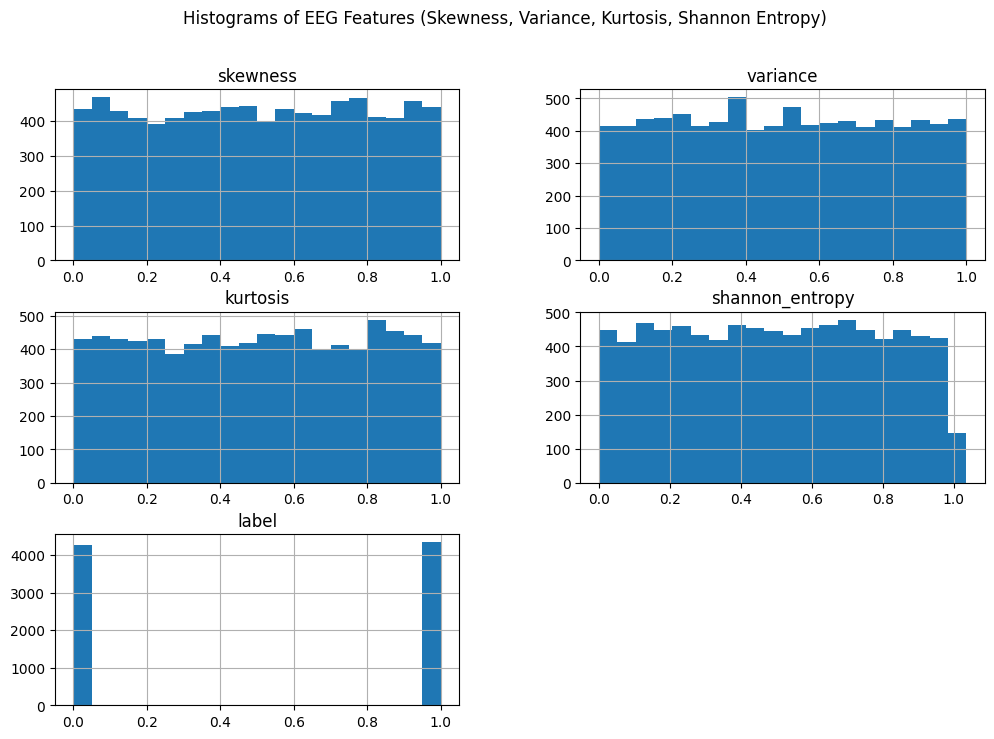

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of EEG Features (Skewness, Variance, Kurtosis, Shannon Entropy)")
plt.show()

Pair plot of features(Grouped by pre and post meditation states)

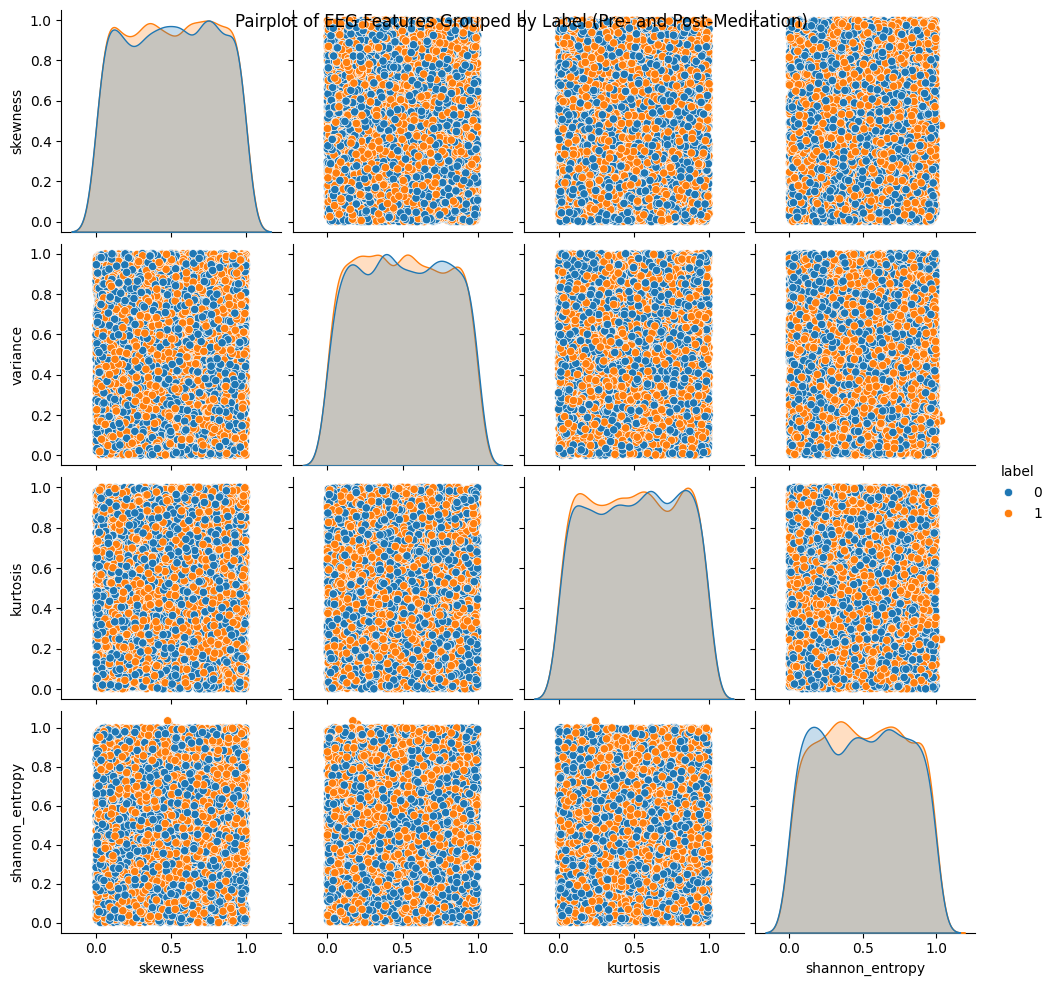

In [5]:
import seaborn as sns

# Pairplot to visualize relationships between features
sns.pairplot(data, hue="label")
plt.suptitle("Pairplot of EEG Features Grouped by Label (Pre- and Post-Meditation)")
plt.show()

Box plot for feature distribution

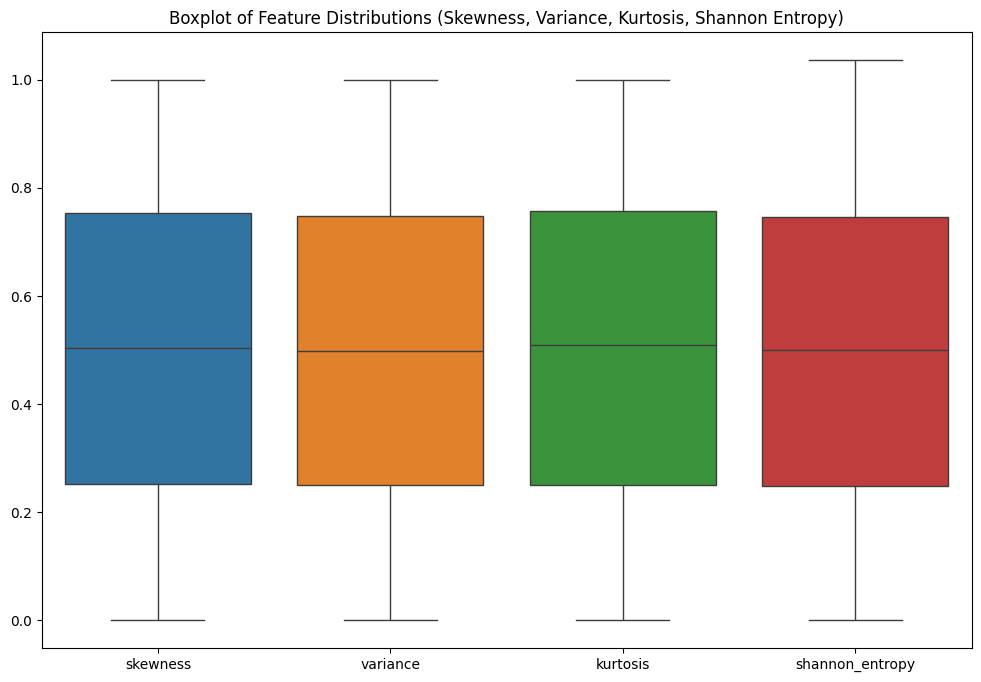

In [6]:
# Boxplot for visualizing distribution of features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['label']))
plt.title("Boxplot of Feature Distributions (Skewness, Variance, Kurtosis, Shannon Entropy)")
plt.show()

Co relation matrix and heatmap

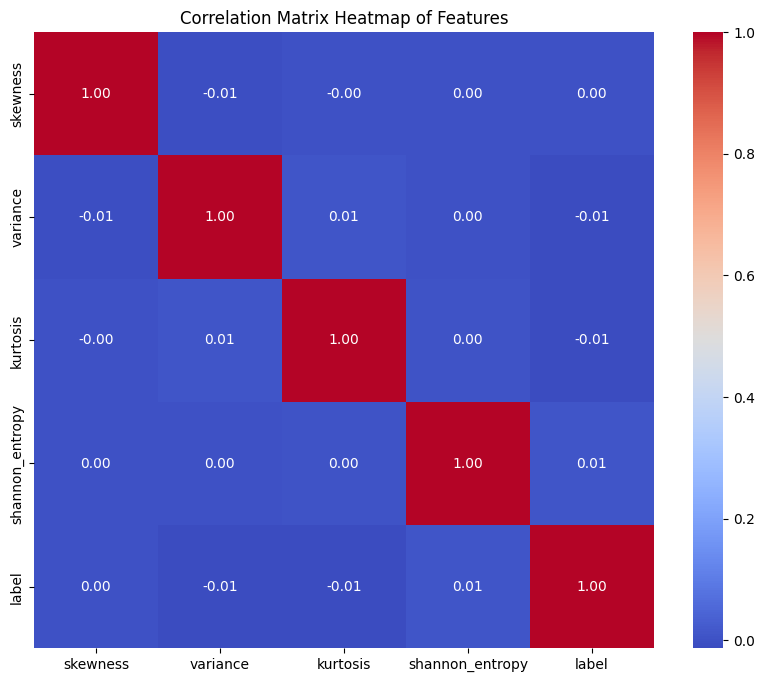

In [7]:
# Correlation matrix
corr_matrix = data.corr()

# Heatmap for visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap of Features")
plt.show()

Trained Test Split and SVM/Random Forest Models

In [8]:
from sklearn.model_selection import train_test_split

# Features and labels
X = data[['skewness', 'variance', 'kurtosis', 'shannon_entropy']]
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display train-test split information
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 6883
Test set size: 1721


Train and Evaluate SVM Model

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44       868
           1       0.50      0.63      0.56       853

    accuracy                           0.51      1721
   macro avg       0.51      0.51      0.50      1721
weighted avg       0.51      0.51      0.50      1721


SVM Accuracy: 0.5084253341080767


Confusion Matrix for SVM

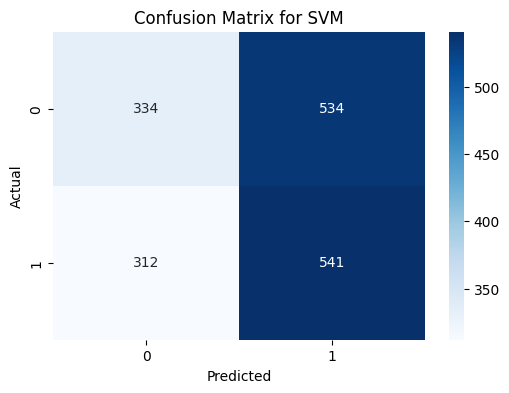

In [10]:
# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Train and Evaluate Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       868
           1       0.49      0.49      0.49       853

    accuracy                           0.49      1721
   macro avg       0.49      0.49      0.49      1721
weighted avg       0.49      0.49      0.49      1721


Random Forest Accuracy: 0.4927367809413132


Confusion Matrix for Random Forest Model

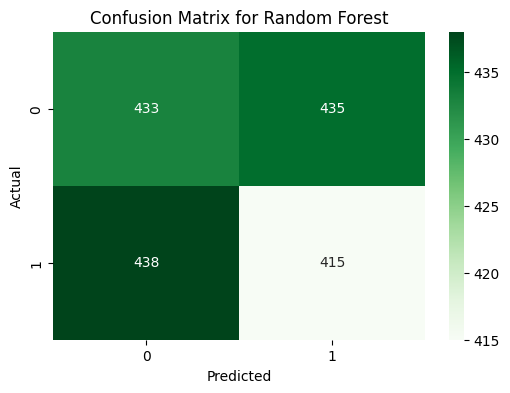

In [12]:
# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Feature Importance(Random Forest)

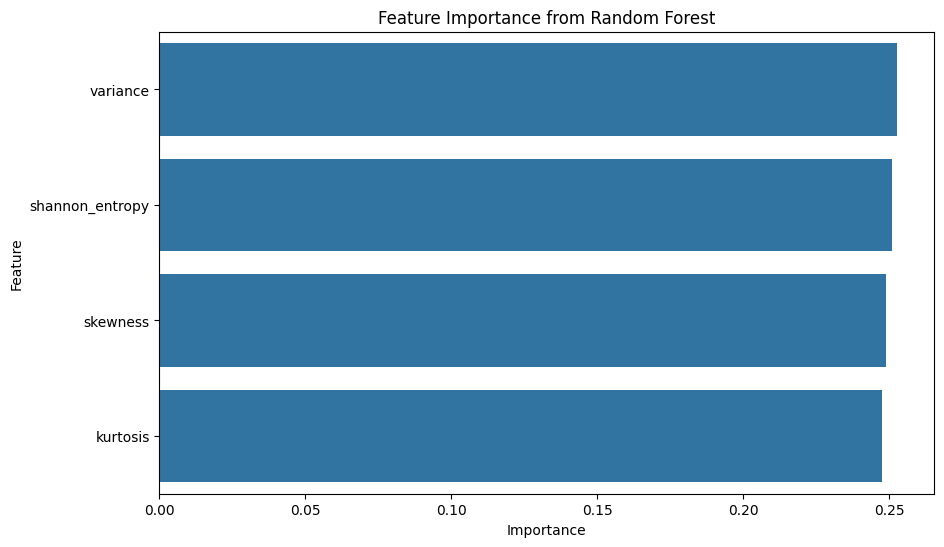

In [13]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()